In [224]:
!pip install librosa==0.8

In [225]:
# !git clone https://github.com/titu1994/keras-attention-augmented-convs

<h1>Various Environmental Sound Classification. Data preprocessing</h1>

# <a class="anchor" id="0."></a>**Content**

 [Summary](#1.)
1. [Initial Data Frames with audio files description](#1e1.)
1. [Number of the observations and classes](#2.)
1. [Add audio duration column to initial dataset](#3.)
1. [Train\Test splitting](#4.)
1. [Data augmentation methods](#5.)
1. [Feature generation](#6.)
1. [Conv. autoencoder model](#7.)
1. [Dense autoencoder model](#8.)
1. [CNN two branches](#9.)
1. [CNN+LSTM](#10.)
1. [CNN+GRU](#11.)

Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="1."></a>
# **Summary**

In this notebook we use following datasets
1. Environmental Sound Classification (https://github.com/karolpiczak/ESC-50, ESC-10, ESC-50).<pre>
The ESC-50 dataset is a labeled collection of 2000 environmental audio recordings suitable for benchmarking methods of environmental sound classification.
The dataset consists of 5-second-long recordings organized into 50 semantical classes (with 40 examples per class) loosely arranged into 5 major categories: Animals, Natural soundscapes & water sounds, Human, non-speech sounds, Interior/domestic sounds, Exterior/urban noises.
Original paper:
K. J. Piczak. ESC: Dataset for Environmental Sound Classification. Proceedings of the 23rd Annual ACM Conference on Multimedia, Brisbane, Australia, 2015.DOI: http://dx.doi.org/10.1145/2733373.2806390</pre>

1. UrbanSound8k (https://www.kaggle.com/chrisfilo/urbansound8k).<pre>
This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music.
Original paper:
J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.</pre>

1. Free sound Kaggle competition (https://zenodo.org/record/2552860#.XpLHe1kzbeR).<pre>
11,073 audio files annotated with 41 labels. 
Original paper:
Eduardo Fonseca, Manoj Plakal, Frederic Font, Daniel P. W. Ellis, Xavier Favory, Jordi Pons, Xavier Serra. "General-purpose Tagging of Freesound Audio with AudioSet Labels: Task Description, Dataset, and Baseline". Proceedings of the DCASE 2018 Workshop (2018)</pre>

1. Bee hive records (https://www.kaggle.com/vitaliygorbenko/uley4-7-winter-2019-2020).<pre>
Bee families in winter period. Not labeled dataset for unsupervised machine learning </pre>


In [226]:
from google.colab import drive
drive.mount("/drive", force_remount=True)

Mounted at /drive


In [227]:
import warnings
warnings.filterwarnings("ignore")

In [228]:
import tensorflow

In [229]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import IPython
import librosa
import seaborn as sb
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import IPython.display as ipd
import os
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.cross_validation import StratifiedKFold
from tensorflow.keras import losses, models, optimizers, regularizers, initializers
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from tensorflow.keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D, 
                              GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,  
                              MaxPooling2D,Flatten,BatchNormalization, Conv2D, 
                              AveragePooling2D, GRU, Bidirectional, Reshape, BatchNormalization, 
                              Conv2DTranspose, LeakyReLU)
from tensorflow.keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D, 
                              GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,  
                              MaxPooling2D,Flatten,BatchNormalization, Conv2D,AveragePooling2D, 
                              UpSampling2D,LocallyConnected2D, ConvLSTM2D,  MaxPooling3D, 
                              AveragePooling3D, TimeDistributed)
from tensorflow.keras.utils import Sequence, to_categorical
# from tensorflow.keras.layers.advanced_activations import LeakyReLU
# from tensorflow.keras.layers.core import Flatten
from tensorflow.keras.optimizers import SGD, Adam



from sklearn.metrics import multilabel_confusion_matrix

import IPython
import random


sys.path.insert(0, os.path.abspath('/drive/My Drive/keras-attention-augmented-convs-master/'))

sys.path.insert(0, os.path.abspath('/drive/My Drive/Colab Notebooks/speech_feature_extractor/'))

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


# Any results you write to the current directory are saved as output.

In [230]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
import math
import random

In [231]:
# import snapshot
# import attn_augconv

In [232]:
librosa.version.version

'0.8.0'

In [233]:
import librosa.display

In [234]:
# pip install git+https://github.com/detly/gammatone.git

In [235]:
pip install spafe

In [236]:
# pip install scikits.talkbox

In [237]:
# pip install essentia

In [238]:
# pip install tools==0.0.2

In [239]:
# import tools

In [240]:
# pip install git+https://github.com/jsingh811/pyAudioProcessing.git

In [241]:
# from gammatone import plot
from spafe.utils import vis
from spafe.features.gfcc import gfcc
from spafe.features.bfcc import bfcc
from spafe.features.pncc import pncc
from spafe.features.ngcc import ngcc
from spafe.features.msrcc import msrcc
from spafe.features.psrcc import psrcc
from spafe.features.lfcc import lfcc

In [242]:
# import essentia

# # as there are 2 operating modes in essentia which have the same algorithms,
# # these latter are dispatched into 2 submodules:
# import essentia.standard
# print(dir(essentia.standard))

In [243]:
#!python -m gammatone '/drive/My Drive/esc/audio/audio/2-60794-A-26.wav' -d 10

In [244]:
# from pyAudioProcessing import *

In [245]:
from scipy import io
from scipy.io import wavfile

# Methods

Features methods

In [246]:
def feat_specshow(S, sr, y_name, hop_len, title):
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S, sr=sr, x_axis='time', y_axis=y_name, hop_length = hop_len, fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.title(title)
        plt.tight_layout()
        plt.show()

In [247]:
def feat_sft(y, hop_len=257, n_fft=1026):
    X = librosa.stft(y, n_fft=n_fft, hop_length=hop_len)
    S_db = librosa.amplitude_to_db(abs(X))
    return S_db

In [248]:
def feat_cqt(y, sr, hop_len=256, n_fft=1026):
    C = np.abs(librosa.cqt(y, sr=sr, hop_length=hop_len))
    S_db = librosa.amplitude_to_db(C, ref=np.max)
    return S_db

In [249]:
def feat_mel(y, sr, n_mfcc=40):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
    # S1 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_db = librosa.power_to_db(abs(mfccs), ref=np.max)
    return S_db

In [250]:
def feat_chroma(y, sr):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return chroma

In [251]:
def feat_gfcc(y, sr, n_fft=1024, num_ceps = 13):
    gfccs = gfcc(y, fs=sr, num_ceps=num_ceps)
    return np.transpose(gfccs)

In [252]:
def feat_bfcc(y, sr, n_fft=1024, num_ceps = 13):
    bfccs = bfcc(y, fs=sr, num_ceps=num_ceps)
    return np.transpose(bfccs)

In [253]:
def feat_lfcc(y, sr, n_fft=1024, num_ceps = 13):
    lfccs = lfcc(y, fs=sr, num_ceps=num_ceps)
    return np.transpose(lfccs)

In [254]:
def feat_ngcc(y, sr, n_fft=1024, num_ceps = 13):
    ngccs = ngcc(y, fs=sr, num_ceps=num_ceps)
    return np.transpose(ngccs)

In [255]:
def feat_msrcc(y, sr, n_fft=1024, num_ceps = 13):
    msrccs = msrcc(y, fs=sr, num_ceps=num_ceps)
    return np.transpose(msrccs)

In [256]:
def feat_psrcc(y, sr, n_fft=1024, num_ceps = 13):
    psrccs = psrcc(y, fs=sr, num_ceps=num_ceps)
    return np.transpose(psrccs)

In [257]:
def feature_vis(name1, name2, y1, y2, sr1, sr2, method):
    hop_length=256

    if method == 'sft':
        S_db1 = feat_sft(y1)
        S_db2 = feat_sft(y2)

        feat_specshow(S_db1, sr1, 'linear', hop_length, 'SFT Spectrogram ' + name1)
        feat_specshow(S_db2, sr2, 'linear', hop_length, 'SFT Spectrogram ' + name2)

   
    if method == 'cqt':
        S_db1 = feat_cqt(y1, sr1)
        S_db2 = feat_cqt(y2, sr1)

        feat_specshow(S_db1, sr1, 'cqt_note', hop_length, 'Constant-Q transform ' + name1)
        feat_specshow(S_db2, sr2, 'cqt_note', hop_length, 'Constant-Q transform ' + name2)
      
    
    if method == 'mel':
        ##### MFCC
        S_db1 = feat_mel(y1, sr1, n_mfcc=40)
        S_db2 = feat_mel(y2, sr2, n_mfcc=40)

        feat_specshow(S_db1, sr1, 'mel', hop_length, 'Mel-spectrogram ' + name1)
        feat_specshow(S_db2, sr2, 'mel', hop_length, 'Mel-spectrogram ' + name2)

    if method == 'chroma':
        ##### Chroma
        S_db1 = feat_chroma(y1, sr1)
        S_db2 = feat_chroma(y2, sr2)

        feat_specshow(S_db1, sr1, 'chroma', hop_length, 'Chromagram' + name1)
        feat_specshow(S_db2, sr2, 'chroma', hop_length, 'Chromagram' + name2)

    if method == 'gfcc':

        S_db1 = feat_gfcc(y1, sr1)
        S_db2 = feat_gfcc(y2, sr2)

        vis.visualize_features(S_db1, 'GFCC Index' + name1, 'Frame Index')
        vis.visualize_features(S_db2, 'GFCC Index' + name2, 'Frame Index')

    if method == 'bfcc':

        S_db1 = feat_bfcc(y1, sr1)
        S_db2 = feat_bfcc(y2, sr2)

        vis.visualize_features(S_db1, 'BFCC Index' + name1, 'Frame Index')
        vis.visualize_features(S_db2, 'BFCC Index' + name2, 'Frame Index')

    if method == 'lfcc':
        S_db1 = feat_lfcc(y1, sr1)
        S_db2 = feat_lfcc(y2, sr2)

        vis.visualize_features(S_db1, 'LFCC Index' + name1, 'Frame Index')
        vis.visualize_features(S_db2, 'LFCC Index' + name2, 'Frame Index')

    if method == 'ngcc':
        S_db1 = feat_ngcc(y1, sr1)
        S_db2 = feat_ngcc(y2, sr2)

        # visualize features
        vis.visualize_features(S_db1, 'NGCC Index' + name1, 'Frame Index')
        vis.visualize_features(S_db2, 'NGCC Index' + name2, 'Frame Index')

    if method == 'msrcc':
        S_db1 = feat_msrcc(y1, sr1)
        S_db2 = feat_msrcc(y2, sr2)

        # visualize features
        vis.visualize_features(S_db1, 'MSRCC Index' + name1, 'Frame Index')
        vis.visualize_features(S_db2, 'MSRCC Index' + name2, 'Frame Index')

    if method == 'psrcc':
        S_db1 = feat_psrcc(y1, sr1)
        S_db2 = feat_psrcc(y2, sr2)

        # visualize features
        vis.visualize_features(S_db1, 'PSRCC Index' + name1, 'Frame Index')
        vis.visualize_features(S_db2, 'PSRCC Index' + name2, 'Frame Index')

    print(np.shape(S_db1))
    print(np.shape(S_db2))




Preprocessing methods

In [258]:
def add_duration_column(df, wav_path, mode):
    """ Adding durarion in sec. column to Data Frame

    Args:
        df: Data Frame, data frame from description csv
        wav_path: string, path to wav files 
        mode: string, alias for certain dataset 'esc', 'us', 'fsd'
    Returns:
        data frame with time column
    """    
    duration = []
    for i in range(len(df)):
        if mode == 'esc':
            fname = wav_path + df.loc[df.index == i]['filename'].values[0]
        if mode == 'us':
            fname = wav_path + 'fold' + str(df.loc[df.index == i]['fold'].values[0]) + '/' + df.loc[df.index == i]['slice_file_name'].values[0]
        if mode == 'fsd':
            fname = wav_path + df.loc[df.index == i]['fname'].values[0]
        print('Loading ...', fname)
        y, sr = librosa.load(fname,sr=None)
        duration.append(librosa.get_duration(y=y, sr=sr))

    tmp = pd.DataFrame(duration)
    tmp.columns = ['time']
    df = pd.concat([df,tmp], axis=1)

    return df

Train \ test splitting

In [259]:
def train_test_(df, target, test_size):
    """ Train\test splitting

    Args:
        df: Data Frame, data frame from description csv
        target: string, column name with category code
        test_size: float, train\test ratio
    Returns:
        train\test dataframes
    """    
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    for train_index, test_index in split.split(df,df[target]):
        strat_train = df.loc[train_index]
        strat_test = df.loc[test_index]

    strat_train = strat_train.dropna()
    strat_test = strat_test.dropna()

    return strat_train, strat_test

Select category


In [260]:
def add_lists(list1,list2):
    out_list = []
    if len(list1) == len(list2):
        for i in range(len(list1)):
            out_list.append(str(list1[i])+ "/" + str(list2[i]))
    return out_list

In [261]:
def select_cat_(df, mode, cat_id):
     
    df = df.reset_index(drop=True)
  
    fname_list = []
    fname_l = []
    fold_l = []

    if mode == 'esc':
        fname_list.extend(list(df.loc[df['target'] == cat_id]['filename'].values))
    if mode == 'us':
        fname_l.extend(list(df.loc[df['classID'] == cat_id]['slice_file_name'].values))
        fold_l.extend(list(df.loc[df['classID'] == cat_id]['fold'].values))
        fname_list = add_lists(fold_l,fname_l)
    if mode == 'fsd':
        fname_list.extend(list(df.loc[df['classID'] == cat_id]['fname'].values))
    
    return fname_list


Data augmentation

In [262]:
def wav_join(df, wav_path, mode, cat_id):
    z = []
    fname_list = select_cat(df, mode, cat_id)
  
    for i in range(len(fname_list)):
        if mode == 'esc':
            fname = wav_path + '/' + str(fname_list[i])
        if mode == 'us':
            fname = wav_path + str(fname_list[i])
        if mode == 'fsd':
            fname = wav_path + str(fname_list[i])

        y, sr = librosa.load(fname,sr=None)
        z.extend(y)

    z = np.array(z)
#     print(len(z))
    fname_out = mode + '_joined_cat_' + str(cat_id) + '.wav'
    librosa.output.write_wav('/kaggle/working/' + fname_out, z, sr)


Feature generation

In [263]:
def non_silent(data_wav, sr):
    y2_ind = librosa.effects.split(y=data_wav,  top_db=10, frame_length=300, hop_length=5)
    y2 = librosa.effects.remix(data_wav, y2_ind)
    if librosa.get_duration(y=y2, sr=sr) < 5:
        rt = librosa.get_duration(y=y2, sr=sr) / 5
        y3 = librosa.effects.time_stretch(y2, rt)
        return y3
    else:
        return y2

In [379]:
def x_features(df, wav_path, mode, method, stretch=False):
    """ Evaluating of X np.array with features

    Args:
        df: Data Frame, data frame from description csv
        wav_path: string, path to wav files 
        mode: string, alias for certain dataset 'esc', 'us', 'fsd'
        method: string,  'sft', 'cqt', 'mel', 'chroma', 'gfcc', 'bfcc', 'lfcc', 'ngcc', 'msrcc', 'psrcc'
    Returns:
        x_train np.array with features
    """    
    from sklearn import preprocessing
    df = df.reset_index(drop=True)
    for i in range(len(df)):
        if mode == 'esc':
            fname = wav_path + df.loc[df.index == i]['filename'].values[0]
        if mode == 'us':
            fname = wav_path + 'fold' + str(df.loc[df.index == i]['fold'].values[0]) + '/' + df.loc[df.index == i]['slice_file_name'].values[0]
        if mode == 'fsd':
            fname = wav_path + df.loc[df.index == i]['fname'].values[0]
        if i % 100 == 0:
            print(str(i) + ' obs. from ' + str(len(df)) + ' are processed')

        # print(fname)

        y, sr = librosa.load(fname,sr=None)
        new_sr = 16000
        y = librosa.resample(y, orig_sr=sr, target_sr=new_sr)
        y2 = y
        # y2 = non_silent(y, sr)
        if (stretch):
            y2, sr = librosa.load(fname,sr=new_sr, duration=2)
            y2 = librosa.effects.time_stretch(y2, rate=2)
            # librosa.output.write_wav('drive/My Drive/temp.wav', y2, new_sr)
            
        

        if method == 'sft':
            spec = feat_sft(y2)
    
        if method == 'cqt':
            spec = feat_cqt(y2, new_sr)
        
        if method == 'mel':
            spec = feat_mel(y2, new_sr, n_mfcc=40)

        if method == 'chroma':
            spec = feat_chroma(y2, new_sr)

        if method == 'gfcc':
            y2 = np.reshape(y2, (np.shape(y2)[0],1))

            spec = feat_gfcc(y2, new_sr)

        if method == 'bfcc':
            y2 = np.reshape(y2, (np.shape(y2)[0],1))
            spec = feat_bfcc(y2, new_sr)

        if method == 'lfcc':
            y2 = np.reshape(y2, (np.shape(y2)[0],1))
            spec = feat_lfcc(y2, new_sr)

        if method == 'ngcc':
            y2 = np.reshape(y2, (np.shape(y2)[0],1))
            spec = feat_ngcc(y2, new_sr)

        if method == 'msrcc':
            y2 = np.reshape(y2, (np.shape(y2)[0],1))
            spec = feat_msrcc(y2, new_sr)

        if method == 'psrcc':
            y2 = np.reshape(y2, (np.shape(y2)[0],1))
            spec = feat_psrcc(y2, new_sr)

        scaler = preprocessing.StandardScaler().fit(spec)
        spec = scaler.transform(spec)

        print(np.shape(spec))

        if i == 0:
            x_train = np.empty(shape=(df.shape[0], spec.shape[0], spec.shape[1], 1))
        spec = np.reshape(spec,(1, spec.shape[0],spec.shape[1], 1))
        x_train[i,] = spec

    return x_train, scaler

In [265]:
def x_load1d(df, wav_path, mode):
    """ Evaluating of X np.array without features

    Args:
        df: Data Frame, data frame from description csv
        wav_path: string, path to wav files 
        mode: string, alias for certain dataset 'esc', 'us', 'fsd'
    Returns:
        x_train np.array 
    """    
    df = df.reset_index(drop=True)
    for i in range(len(df)):
        if mode == 'esc':
            fname = wav_path + df.loc[df.index == i]['filename'].values[0]
        if mode == 'us':
            fname = wav_path + 'fold' + str(df.loc[df.index == i]['fold'].values[0]) + '/' + df.loc[df.index == i]['slice_file_name'].values[0]
        if mode == 'fsd':
            fname = wav_path + df.loc[df.index == i]['fname'].values[0]

        y, sr = librosa.load(fname,sr=None)
        spec = y
        if i == 0:
            x_train = np.empty(shape=(df.shape[0], spec.shape[0]))
        spec = np.reshape(spec,(1, spec.shape[0]))
        x_train[i,] = spec

    return x_train, sr

In [266]:
def y_binvec(df, target, n_classes):
    """ Evaluating of y binary np.array with category binarize

    Args:
        df: Data Frame, data frame from description csv
        target: string, name of the target column 
        mode: string, alias for certain dataset 'esc', 'us', 'fsd'
    Returns:
        x_train np.array with features
    """  
    y_train = []
    df = df.reset_index(drop=True)
    for i in range(len(df)):
        y_val = int(df.loc[df.index == i][target].values[0])
        y_bin = to_categorical(y_val, num_classes=n_classes, dtype='int32')
        y_train.append(y_bin)
        
    return y_train

In [267]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

In [268]:
### Data augmentation
def select_cat(x_data, y_data, class_ind, n_sample):
    to_use = []
    for count, row in enumerate(y_data):
        if (row.argmax() == class_ind) and (sum(row) > 0):
            to_use.append(count)
    to_use = random.choices(to_use, k=n_sample)
    return x_data[[to_use]]

Data stat

In [269]:
def data_stat(data_array):
    print('min', np.min(data_array))
    print('max', np.max(data_array))
    print('mean', np.mean(data_array))
    print('std', np.std(data_array))
    print('quantile 25', np.quantile(data_array, .25))
    print('quantile 50', np.quantile(data_array, .50))
    print('quantile 75', np.quantile(data_array, .75))

    return np.mean(data_array), np.std(data_array), np.quantile(data_array, .25), np.quantile(data_array, .50), np.quantile(data_array, .75)

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="1."></a>
# **Features visual**

Exploratory analysis

In [270]:
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/5-9032-A-0.wav', sr=None) # dog

# y1, sr1 = librosa.load('/drive/My Drive/esc/audio/audio/2-173607-A-39.wav', sr=None)
y1, sr1 = librosa.load('/drive/My Drive/esc/audio/audio/1-116765-A-41.wav', sr=None) # chainsaw
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/2-131943-A-38.wav', sr=None) # clock-tick
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/2-28314-A-12.wav', sr=None) # crackling fire
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/2-66637-A-20.wav', sr=None) # crying baby
y2, sr2 = librosa.load('/drive/My Drive/esc/audio/audio/3-150979-B-40.wav', sr=None) # helicopter
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/1-50060-A-10.wav', sr=None) # rain
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/2-95035-A-1.wav', sr=None) # rooster
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/3-144827-A-11.wav', sr=None) # sea_waves
# y, sr = librosa.load('/drive/My Drive/esc/audio/audio/4-185619-A-21.wav', sr=None) # sneezing


In [271]:
IPython.display.Audio(data=y1, rate=sr1)


In [272]:
IPython.display.Audio(data=y2, rate=sr2)

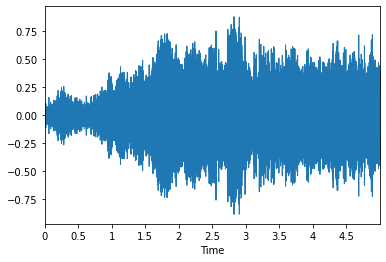

In [273]:
librosa.display.waveplot(y1, sr=sr1)

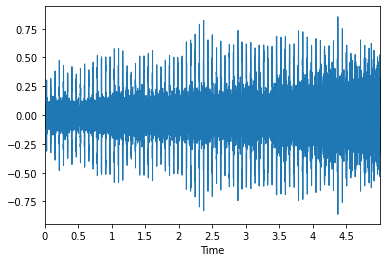

In [274]:
librosa.display.waveplot(y2, sr=sr2)

In [275]:
y1 = librosa.resample(y1, orig_sr=sr1, target_sr=16000)
y2 = librosa.resample(y2, orig_sr=sr2, target_sr=16000)

In [276]:
np.shape(y1)[0]

80000

In [277]:
y11 = np.reshape(y1, (np.shape(y1)[0],1))
y21= np.reshape(y2, (np.shape(y1)[0],1))

In [278]:
np.shape(y1)

(80000,)

In [279]:
sr3, y3 = scipy.io.wavfile.read("/drive/My Drive/esc/audio/audio/1-116765-A-41.wav")

In [280]:
np.shape(y3)

(220500,)

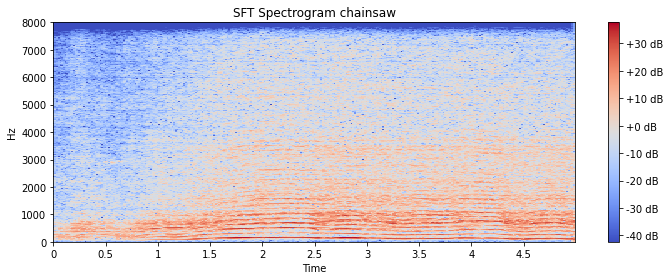

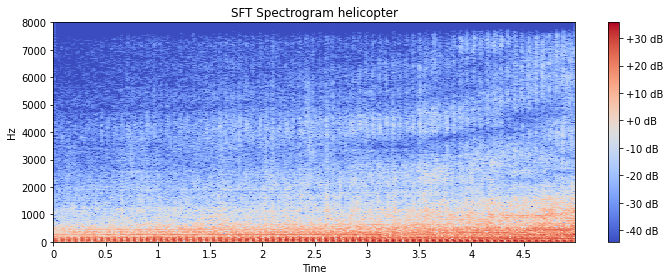

(514, 312)
(514, 312)


In [281]:
feature_vis('chainsaw', 'helicopter', y1, y2, 16000, 16000, method='sft')

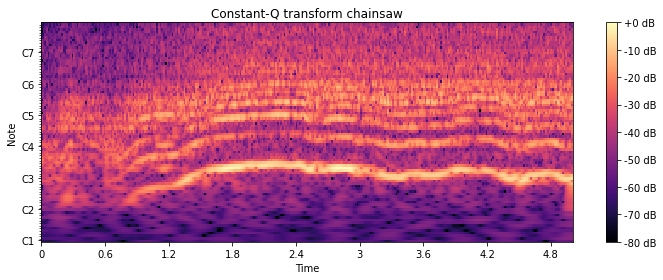

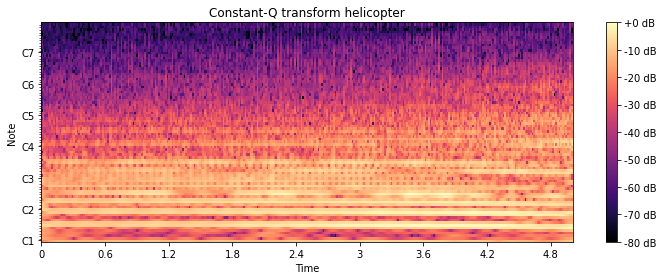

(84, 313)
(84, 313)


In [282]:
feature_vis('chainsaw', 'helicopter', y1, y2, 16000, 16000, method='cqt')

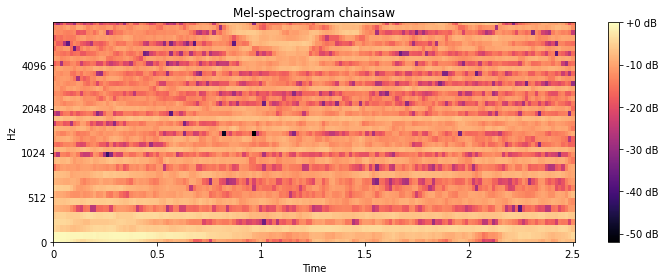

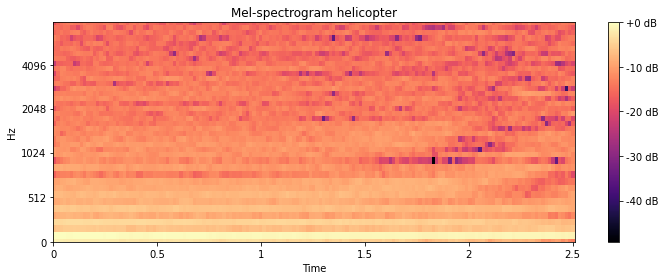

(40, 157)
(40, 157)


In [283]:
feature_vis('chainsaw', 'helicopter', y1, y2, 16000, 16000, method='mel')

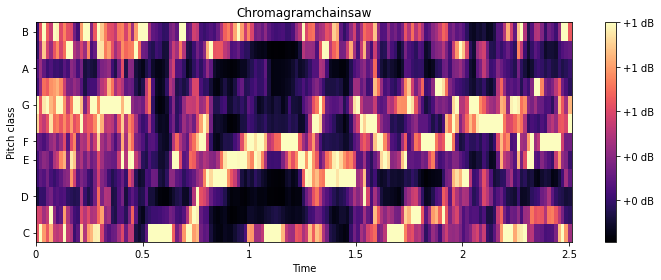

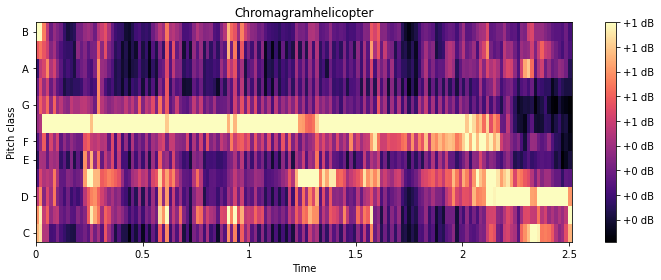

(12, 157)
(12, 157)


In [284]:
feature_vis('chainsaw', 'helicopter', y1, y2, 16000, 16000, method='chroma')

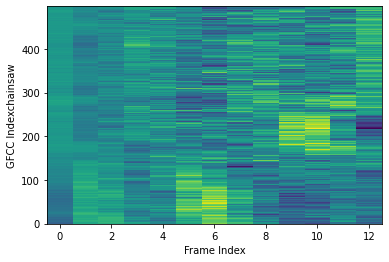

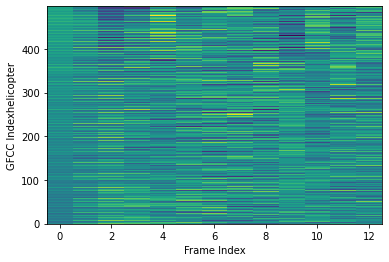

(13, 498)
(13, 498)


In [285]:
feature_vis('chainsaw', 'helicopter', y11, y21, 16000, 16000, method='gfcc')

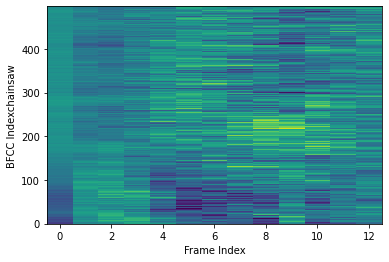

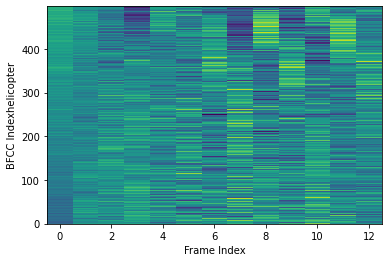

(13, 498)
(13, 498)


In [286]:
feature_vis('chainsaw', 'helicopter', y11, y21, 16000, 16000, method='bfcc')

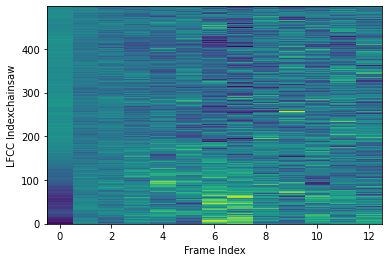

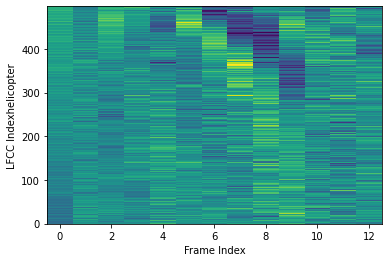

(13, 498)
(13, 498)


In [287]:
feature_vis('chainsaw', 'helicopter', y11, y21, 16000, 16000, method='lfcc')

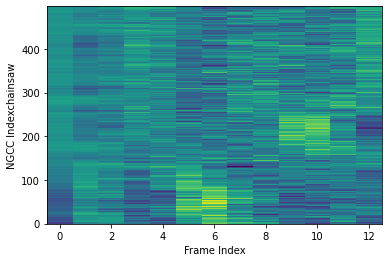

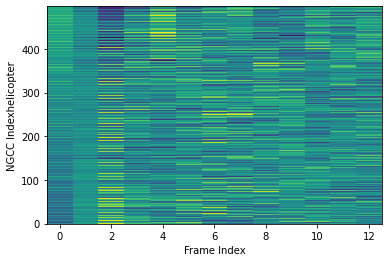

(13, 498)
(13, 498)


In [288]:
feature_vis('chainsaw', 'helicopter', y11, y21, 16000, 16000, method='ngcc')

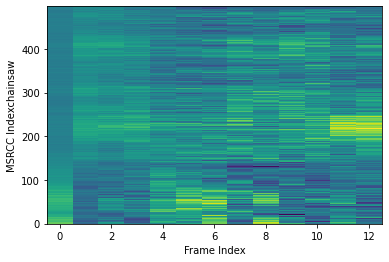

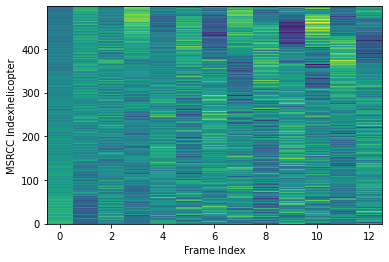

(13, 498)
(13, 498)


In [289]:
feature_vis('chainsaw', 'helicopter', y11, y21, 16000, 16000, method='msrcc')

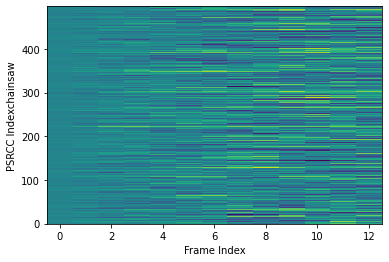

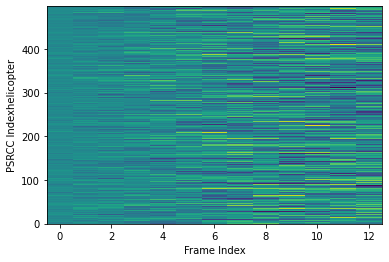

(13, 498)
(13, 498)


In [290]:
feature_vis('chainsaw', 'helicopter', y11, y21, 16000, 16000, method='psrcc')

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="1e1."></a>
# **Initial Data Frames with audio files description**

In [291]:
csv_path_esc = '/drive/My Drive/esc/esc50.csv'
wav_dir_esc =  '/drive/My Drive/esc/audio/audio/'

csv_path_us = '/drive/My Drive/urbansound/UrbanSound8K.csv'
wav_dir_us =  '/drive/My Drive/urbansound/'

csv_path_fsd_train = '/drive/My Drive/freesound/FSDKaggle2018.meta/FSDKaggle2018.meta/train_post_competition.csv'
csv_path_fsd_test = '/drive/My Drive/freesound/FSDKaggle2018.meta/FSDKaggle2018.meta/test_post_competition_scoring_clips.csv'
wav_dir_fsd_train = '/drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/'
wav_dir_fsd_test = '/drive/My Drive/freesound/FSDKaggle2018.audio_test/FSDKaggle2018.audio_test/'

# wav_dir_bee = '/kaggle/input/uley4-7-winter-2019-2020/uley_4_7_winter_2019-2020/'

In [292]:
df_esc = pd.read_csv(csv_path_esc)
df_us = pd.read_csv(csv_path_us)

In [293]:
df_fsd_train = pd.read_csv(csv_path_fsd_train)
df_fsd_test = pd.read_csv(csv_path_fsd_test)

Environmental Sound Classification dataset

In [294]:
print(df_esc)

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]


In [295]:
print(df_esc.loc[df_esc['esc10']==True])

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
14     1-110389-A-0.wav     1       0             dog   True    110389    A
24    1-116765-A-41.wav     1      41        chainsaw   True    116765    A
54     1-17150-A-12.wav     1      12  crackling_fire   True     17150    A
55    1-172649-A-40.wav     1      40      helicopter   True    172649    A
56    1-172649-B-40.wav     1      40      helicopter   True    172649    B
57    1-172649-C-40.wav     1      40      helicopter   True    172649    C
58    1-172649-D-40.wav     1      40      helicopter   True    172649    D
59    1-172649-E-40.wav     1      40      helicopter   True    172649    E
60    1-172649-F-40.wav     1      40      helicopter   True    172649    F
62     1-17367-A-10.wav     1      10            rain   True     17367    A
63     1-17565-A-12.wav     1      12  crackling_fire   True     17565    A
65     1-177

In [296]:
dc = print((df_esc[['category', 'target']].sort_values(by=['target'])))

      category  target
0          dog       0
1031       dog       0
954        dog       0
923        dog       0
522        dog       0
...        ...     ...
1959  hand_saw      49
1960  hand_saw      49
1961  hand_saw      49
1963  hand_saw      49
1510  hand_saw      49

[2000 rows x 2 columns]


In [297]:
for i in range(50):
    print(i, ': ', set(df_esc[df_esc['target']==i]['category']))


0 :  {'dog'}
1 :  {'rooster'}
2 :  {'pig'}
3 :  {'cow'}
4 :  {'frog'}
5 :  {'cat'}
6 :  {'hen'}
7 :  {'insects'}
8 :  {'sheep'}
9 :  {'crow'}
10 :  {'rain'}
11 :  {'sea_waves'}
12 :  {'crackling_fire'}
13 :  {'crickets'}
14 :  {'chirping_birds'}
15 :  {'water_drops'}
16 :  {'wind'}
17 :  {'pouring_water'}
18 :  {'toilet_flush'}
19 :  {'thunderstorm'}
20 :  {'crying_baby'}
21 :  {'sneezing'}
22 :  {'clapping'}
23 :  {'breathing'}
24 :  {'coughing'}
25 :  {'footsteps'}
26 :  {'laughing'}
27 :  {'brushing_teeth'}
28 :  {'snoring'}
29 :  {'drinking_sipping'}
30 :  {'door_wood_knock'}
31 :  {'mouse_click'}
32 :  {'keyboard_typing'}
33 :  {'door_wood_creaks'}
34 :  {'can_opening'}
35 :  {'washing_machine'}
36 :  {'vacuum_cleaner'}
37 :  {'clock_alarm'}
38 :  {'clock_tick'}
39 :  {'glass_breaking'}
40 :  {'helicopter'}
41 :  {'chainsaw'}
42 :  {'siren'}
43 :  {'car_horn'}
44 :  {'engine'}
45 :  {'train'}
46 :  {'church_bells'}
47 :  {'airplane'}
48 :  {'fireworks'}
49 :  {'hand_saw'}


UrbanSound8k dataset

In [298]:
print(df_us)

         slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  chil

Freesound dataset

In [299]:
print(df_fsd_train)

             fname         label  manually_verified  freesound_id  \
0     00044347.wav        Hi-hat                  0         28739   
1     001ca53d.wav     Saxophone                  1        358827   
2     002d256b.wav       Trumpet                  0         10897   
3     0033e230.wav  Glockenspiel                  1        325017   
4     00353774.wav         Cello                  1        195688   
...            ...           ...                ...           ...   
9468  ffec59fb.wav     Fireworks                  0        343090   
9469  fff37590.wav        Hi-hat                  0         33136   
9470  fff44ac6.wav      Laughter                  0        133674   
9471  fff6a13d.wav         Chime                  0         14640   
9472  fff81f55.wav         Cough                  1         19117   

                 license  
0            Attribution  
1            Attribution  
2     Creative Commons 0  
3            Attribution  
4            Attribution  
...      

In [300]:
print(df_fsd_test)

             fname      label    usage  freesound_id             license
0     00326aa9.wav       Oboe  Private        355125         Attribution
1     0038a046.wav  Bass_drum  Private         90621  Creative Commons 0
2     007759c4.wav  Saxophone  Private         13406  Creative Commons 0
3     008afd93.wav  Saxophone  Private        358962         Attribution
4     00ae03f6.wav      Chime  Private         78203         Attribution
...            ...        ...      ...           ...                 ...
1595  ff96680f.wav       Meow  Private        352227         Attribution
1596  ffa69cfc.wav  Telephone  Private         66290         Attribution
1597  ffaca82d.wav   Scissors   Public        332471  Creative Commons 0
1598  ffb6eb52.wav    Cowbell  Private         91139  Creative Commons 0
1599  ffba7963.wav   Clarinet  Private        248994         Attribution

[1600 rows x 5 columns]


In [301]:
train_set = set(df_fsd_train['label'])
test_set = set(df_fsd_test['label'])
print(train_set ^ test_set)
print(len(test_set))

set()
41


In [302]:
fsd_label_dic = dict(zip(train_set, range(len(train_set))))
print(fsd_label_dic)

{'Squeak': 0, 'Meow': 1, 'Chime': 2, 'Hi-hat': 3, 'Fireworks': 4, 'Oboe': 5, 'Burping_or_eructation': 6, 'Keys_jangling': 7, 'Saxophone': 8, 'Flute': 9, 'Cowbell': 10, 'Applause': 11, 'Finger_snapping': 12, 'Bus': 13, 'Glockenspiel': 14, 'Microwave_oven': 15, 'Acoustic_guitar': 16, 'Knock': 17, 'Cough': 18, 'Trumpet': 19, 'Harmonica': 20, 'Telephone': 21, 'Clarinet': 22, 'Cello': 23, 'Laughter': 24, 'Electric_piano': 25, 'Bass_drum': 26, 'Shatter': 27, 'Fart': 28, 'Computer_keyboard': 29, 'Scissors': 30, 'Gong': 31, 'Snare_drum': 32, 'Tambourine': 33, 'Gunshot_or_gunfire': 34, 'Tearing': 35, 'Writing': 36, 'Drawer_open_or_close': 37, 'Violin_or_fiddle': 38, 'Double_bass': 39, 'Bark': 40}


In [303]:
df_fsd_train['label']

0             Hi-hat
1          Saxophone
2            Trumpet
3       Glockenspiel
4              Cello
            ...     
9468       Fireworks
9469          Hi-hat
9470        Laughter
9471           Chime
9472           Cough
Name: label, Length: 9473, dtype: object

In [304]:
df_fsd_train_classId = [fsd_label_dic[name] for name in df_fsd_train['label']]
df_fsd_test_classId = [fsd_label_dic[name] for name in df_fsd_test['label']]
print(df_fsd_train_classId)

[3, 8, 19, 14, 23, 23, 17, 34, 22, 29, 3, 7, 32, 36, 23, 24, 24, 35, 28, 24, 5, 9, 3, 18, 21, 32, 9, 40, 14, 2, 26, 28, 23, 13, 0, 30, 20, 0, 22, 30, 22, 31, 36, 15, 6, 20, 23, 39, 39, 27, 3, 4, 3, 4, 40, 33, 27, 31, 20, 39, 21, 26, 36, 20, 27, 20, 35, 15, 34, 5, 40, 28, 7, 0, 6, 13, 17, 39, 29, 10, 15, 4, 24, 26, 33, 7, 3, 3, 17, 28, 10, 25, 22, 4, 1, 39, 23, 7, 34, 21, 9, 35, 36, 22, 18, 39, 23, 33, 20, 22, 9, 37, 11, 23, 4, 19, 7, 16, 33, 10, 27, 0, 2, 5, 17, 1, 14, 27, 10, 17, 39, 19, 25, 37, 5, 3, 26, 22, 31, 24, 38, 35, 4, 0, 19, 25, 32, 24, 19, 38, 5, 19, 40, 0, 31, 18, 31, 23, 11, 12, 36, 17, 40, 17, 32, 22, 6, 17, 27, 26, 38, 39, 12, 26, 17, 40, 28, 39, 4, 32, 11, 23, 38, 27, 21, 31, 5, 4, 8, 34, 0, 27, 5, 19, 16, 8, 38, 39, 22, 17, 36, 29, 12, 28, 19, 25, 19, 23, 24, 11, 37, 22, 29, 32, 24, 19, 8, 19, 33, 20, 32, 32, 20, 38, 12, 20, 3, 30, 22, 10, 4, 40, 26, 40, 31, 8, 37, 3, 12, 4, 32, 40, 38, 23, 15, 20, 23, 15, 26, 8, 19, 39, 16, 24, 5, 0, 28, 0, 3, 37, 40, 20, 0, 35, 5, 1

In [305]:
tmp = pd.DataFrame(df_fsd_train_classId)
tmp.columns = ['classID']
df_fsd_train = pd.concat([df_fsd_train,tmp], axis=1)
tmp = pd.DataFrame(df_fsd_test_classId)
tmp.columns = ['classID']
df_fsd_test = pd.concat([df_fsd_test,tmp], axis=1)

In [306]:
print(df_fsd_train)

             fname         label  manually_verified  freesound_id  \
0     00044347.wav        Hi-hat                  0         28739   
1     001ca53d.wav     Saxophone                  1        358827   
2     002d256b.wav       Trumpet                  0         10897   
3     0033e230.wav  Glockenspiel                  1        325017   
4     00353774.wav         Cello                  1        195688   
...            ...           ...                ...           ...   
9468  ffec59fb.wav     Fireworks                  0        343090   
9469  fff37590.wav        Hi-hat                  0         33136   
9470  fff44ac6.wav      Laughter                  0        133674   
9471  fff6a13d.wav         Chime                  0         14640   
9472  fff81f55.wav         Cough                  1         19117   

                 license  classID  
0            Attribution        3  
1            Attribution        8  
2     Creative Commons 0       19  
3            Attribution   

In [307]:
print(df_fsd_test)

             fname      label    usage  freesound_id             license  \
0     00326aa9.wav       Oboe  Private        355125         Attribution   
1     0038a046.wav  Bass_drum  Private         90621  Creative Commons 0   
2     007759c4.wav  Saxophone  Private         13406  Creative Commons 0   
3     008afd93.wav  Saxophone  Private        358962         Attribution   
4     00ae03f6.wav      Chime  Private         78203         Attribution   
...            ...        ...      ...           ...                 ...   
1595  ff96680f.wav       Meow  Private        352227         Attribution   
1596  ffa69cfc.wav  Telephone  Private         66290         Attribution   
1597  ffaca82d.wav   Scissors   Public        332471  Creative Commons 0   
1598  ffb6eb52.wav    Cowbell  Private         91139  Creative Commons 0   
1599  ffba7963.wav   Clarinet  Private        248994         Attribution   

      classID  
0           5  
1          26  
2           8  
3           8  
4      

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="2."></a>
# **Number of the observations and classes**

ESC-50

In [308]:
print("Number of observations ESC = ", df_esc.shape[0], "  Number of classes = ", len(df_esc.category.unique()))

Number of observations ESC =  2000   Number of classes =  50


UrbanSound

In [309]:
print("Number of observations UrbSound = ", df_us.shape[0], "  Number of classes = ", len(df_us.classID.unique()))

Number of observations UrbSound =  8732   Number of classes =  10


Freesound

In [310]:
print("Number of training examples FSD = ", df_fsd_train.shape[0], "  Number of classes = ", len(df_fsd_train.label.unique()))

Number of training examples FSD =  9473   Number of classes =  41


In [311]:
print("Number of testing examples FSD = ", df_fsd_test.shape[0], "  Number of classes = ", len(df_fsd_test.label.unique()))

Number of testing examples FSD =  1600   Number of classes =  41


<h2> Number of the observations per class </h2>

ESC-50

In [312]:
df_esc['category'].value_counts()

cat                 40
car_horn            40
door_wood_knock     40
pouring_water       40
brushing_teeth      40
door_wood_creaks    40
pig                 40
sneezing            40
water_drops         40
clock_tick          40
insects             40
rooster             40
sheep               40
crackling_fire      40
church_bells        40
coughing            40
helicopter          40
thunderstorm        40
crying_baby         40
dog                 40
hen                 40
rain                40
clock_alarm         40
can_opening         40
toilet_flush        40
glass_breaking      40
clapping            40
chirping_birds      40
vacuum_cleaner      40
washing_machine     40
mouse_click         40
fireworks           40
snoring             40
drinking_sipping    40
sea_waves           40
cow                 40
breathing           40
footsteps           40
siren               40
crickets            40
airplane            40
wind                40
crow                40
keyboard_ty

UrbanSound

In [313]:
df_us['class'].value_counts()

dog_bark            1000
jackhammer          1000
street_music        1000
drilling            1000
air_conditioner     1000
engine_idling       1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [355]:
len(set(df_us['class']))

10

Freesound

In [314]:
df_fsd_train['label'].value_counts()

Shatter                  300
Double_bass              300
Violin_or_fiddle         300
Tearing                  300
Fart                     300
Clarinet                 300
Flute                    300
Trumpet                  300
Cello                    300
Bass_drum                300
Squeak                   300
Acoustic_guitar          300
Snare_drum               300
Saxophone                300
Applause                 300
Fireworks                300
Hi-hat                   300
Laughter                 300
Oboe                     299
Gong                     292
Knock                    279
Writing                  270
Cough                    243
Bark                     239
Tambourine               221
Burping_or_eructation    210
Cowbell                  191
Harmonica                165
Drawer_open_or_close     158
Meow                     155
Electric_piano           150
Gunshot_or_gunfire       147
Microwave_oven           146
Keys_jangling            139
Telephone     

In [315]:
df_fsd_test['label'].value_counts()

Saxophone                110
Violin_or_fiddle         108
Gunshot_or_gunfire        63
Clarinet                  56
Flute                     55
Cello                     54
Telephone                 48
Acoustic_guitar           45
Oboe                      42
Cowbell                   42
Double_bass               40
Tambourine                40
Hi-hat                    39
Knock                     39
Laughter                  38
Trumpet                   37
Gong                      37
Snare_drum                34
Finger_snapping           33
Harmonica                 33
Applause                  32
Fireworks                 32
Burping_or_eructation     32
Electric_piano            32
Fart                      30
Cough                     30
Squeak                    29
Drawer_open_or_close      29
Chime                     29
Glockenspiel              29
Meow                      29
Shatter                   29
Writing                   29
Microwave_oven            29
Keys_jangling 

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="3."></a>
# **Add audio duration column to initial dataset**

In [316]:
df_esc_time = add_duration_column(df_esc, wav_dir_esc, 'esc')
df_us_time = add_duration_column(df_us, wav_dir_us, 'us')
df_fsd_train_time = add_duration_column(df_fsd_train, wav_dir_fsd_train, 'fsd')
df_fsd_test_time = add_duration_column(df_fsd_test, wav_dir_fsd_test, 'fsd')

Streaming output truncated to the last 5000 lines.
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5a68a8c.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5a7b9a9.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5a7f4df.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5b01a7d.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5b893e6.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5bbd485.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5bfcdee.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5c51c97.wav
Loading ... /drive/My Drive/freesound/FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/a5c78dd5.wav
Loading ... /drive/My 

In [317]:
# print(df_us_time)

In [318]:
print(df_esc_time)

               filename  fold  target        category  esc10  src_file take  \
0      1-100032-A-0.wav     1       0             dog   True    100032    A   
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A   
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A   
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B   
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A   
...                 ...   ...     ...             ...    ...       ...  ...   
1995   5-263831-B-6.wav     5       6             hen  False    263831    B   
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A   
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A   
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A   
1999     5-9032-A-0.wav     5       0             dog   True      9032    A   

      time  
0      5.0  
1      5.0  
2      5.0  

In [319]:
# print(df_fsd_train_time)

In [320]:
# print(df_fsd_test_time)

In [321]:
# len(df_us_time.loc[df_us_time['time']!=4])

In [322]:
# len(df_esc_time.loc[df_esc_time['time']!=5])

In [387]:
df_us_time.to_hdf('/drive/My Drive/df_us_time.hdf','df', mode='w')

In [323]:
df_us_time.describe()

,fsID,start,end,salience,fold,classID,time
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,3.607522
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,0.974394
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,0.050000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,4.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,4.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000,4.036647


In [386]:
df_esc_time.to_hdf('/drive/My Drive/df_esc_time.hdf','df', mode='w')

In [324]:
df_esc_time.describe()

,fold,target,src_file,time
count,2000.000000,2000.000000,2000.000000,2000.0
mean,3.000000,24.500000,137696.797500,5.0
std,1.414567,14.434479,64882.993641,0.0
min,1.000000,0.000000,137.000000,5.0
25%,2.000000,12.000000,87726.250000,5.0
50%,3.000000,24.500000,143745.500000,5.0
75%,4.000000,37.000000,188215.000000,5.0
max,5.000000,49.000000,264453.000000,5.0


In [388]:
df_fsd_train_time.to_hdf('/drive/My Drive/df_fsd_train_time.hdf','df', mode='w')

In [325]:
df_fsd_train_time.describe()

,manually_verified,freesound_id,classID,time
count,9473.000000,9473.000000,9473.000000,9473.000000
mean,0.391639,191679.851684,20.374433,6.787997
std,0.488143,120504.169241,11.996370,7.035704
min,0.000000,6.000000,0.000000,0.300000
25%,0.000000,86148.000000,9.000000,1.620000
50%,0.000000,185439.000000,21.000000,4.060000
75%,1.000000,324192.000000,31.000000,9.380000
max,1.000000,384228.000000,40.000000,30.000000


In [389]:
df_fsd_test_time.to_hdf('/drive/My Drive/df_fsd_test_time.hdf','df', mode='w')

In [326]:
df_fsd_test_time.describe()

,freesound_id,classID,time
count,1600.000000,1600.000000,1600.000000
mean,223829.509375,20.323125,5.203700
std,118077.386558,11.965918,5.468978
min,2510.000000,0.000000,0.300000
25%,119323.000000,9.000000,1.460000
50%,234286.500000,21.000000,3.440000
75%,354250.250000,31.000000,7.040000
max,383988.000000,40.000000,29.740000


In [327]:
esc10 = df_esc_time.loc[df_esc_time['esc10'] == True]

In [328]:
set(esc10['category'])

{'chainsaw',
 'clock_tick',
 'crackling_fire',
 'crying_baby',
 'dog',
 'helicopter',
 'rain',
 'rooster',
 'sea_waves',
 'sneezing'}

In [329]:
df_esc10 = df_esc_time.loc[df_esc_time['esc10'] == True]

In [330]:
df_esc10.describe()

,fold,target,src_file,time
count,400.000000,400.00000,400.000000,400.0
mean,3.000000,19.40000,135541.787500,5.0
std,1.415985,14.74393,61182.021319,0.0
min,1.000000,0.00000,4211.000000,5.0
25%,2.000000,10.00000,82246.000000,5.0
50%,3.000000,16.00000,152007.000000,5.0
75%,4.000000,38.00000,184102.500000,5.0
max,5.000000,41.00000,235671.000000,5.0


In [331]:
set(esc10['category'])

{'chainsaw',
 'clock_tick',
 'crackling_fire',
 'crying_baby',
 'dog',
 'helicopter',
 'rain',
 'rooster',
 'sea_waves',
 'sneezing'}

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="4."></a>
# **Train\Test splitting**

In [332]:
df_esc_train, df_esc_test = train_test_(df_esc, 'target', 0.2)

df_us_train, df_us_test = train_test_(df_us, 'classID', 0.2)

In [337]:
print(df_esc10.reset_index(drop=True))

              filename  fold  target        category  esc10  src_file take  \
0     1-100032-A-0.wav     1       0             dog   True    100032    A   
1     1-110389-A-0.wav     1       0             dog   True    110389    A   
2    1-116765-A-41.wav     1      41        chainsaw   True    116765    A   
3     1-17150-A-12.wav     1      12  crackling_fire   True     17150    A   
4    1-172649-A-40.wav     1      40      helicopter   True    172649    A   
5    1-172649-B-40.wav     1      40      helicopter   True    172649    B   
6    1-172649-C-40.wav     1      40      helicopter   True    172649    C   
7    1-172649-D-40.wav     1      40      helicopter   True    172649    D   
8    1-172649-E-40.wav     1      40      helicopter   True    172649    E   
9    1-172649-F-40.wav     1      40      helicopter   True    172649    F   
10    1-17367-A-10.wav     1      10            rain   True     17367    A   
11    1-17565-A-12.wav     1      12  crackling_fire   True     

In [338]:
df_esc10_train, df_esc10_test = train_test_(df_esc10.reset_index(drop=True), 'target', 0.2)

In [339]:
df_esc_train['category'].value_counts()

cat                 32
car_horn            32
door_wood_knock     32
pouring_water       32
brushing_teeth      32
door_wood_creaks    32
pig                 32
sneezing            32
helicopter          32
chainsaw            32
insects             32
rooster             32
water_drops         32
crackling_fire      32
sheep               32
church_bells        32
coughing            32
thunderstorm        32
crying_baby         32
dog                 32
hen                 32
rain                32
clock_alarm         32
can_opening         32
toilet_flush        32
glass_breaking      32
clapping            32
chirping_birds      32
vacuum_cleaner      32
washing_machine     32
mouse_click         32
fireworks           32
snoring             32
drinking_sipping    32
sea_waves           32
cow                 32
breathing           32
footsteps           32
siren               32
crickets            32
airplane            32
wind                32
crow                32
keyboard_ty

In [340]:
df_esc_test['category'].value_counts()

cow                 8
hand_saw            8
engine              8
wind                8
snoring             8
coughing            8
car_horn            8
helicopter          8
can_opening         8
thunderstorm        8
crying_baby         8
keyboard_typing     8
laughing            8
door_wood_knock     8
frog                8
chainsaw            8
dog                 8
train               8
hen                 8
chirping_birds      8
rain                8
crow                8
clock_alarm         8
clapping            8
church_bells        8
sheep               8
airplane            8
crickets            8
pouring_water       8
brushing_teeth      8
cat                 8
crackling_fire      8
vacuum_cleaner      8
washing_machine     8
door_wood_creaks    8
pig                 8
sea_waves           8
sneezing            8
mouse_click         8
fireworks           8
toilet_flush        8
water_drops         8
drinking_sipping    8
clock_tick          8
insects             8
rooster   

In [342]:
df_esc10_train['category'].value_counts()

helicopter        32
crackling_fire    32
clock_tick        32
dog               32
sea_waves         32
rooster           32
chainsaw          32
sneezing          32
rain              32
crying_baby       32
Name: category, dtype: int64

In [343]:
df_esc10_test['category'].value_counts()

crying_baby       8
rooster           8
chainsaw          8
dog               8
helicopter        8
crackling_fire    8
clock_tick        8
rain              8
sneezing          8
sea_waves         8
Name: category, dtype: int64

In [344]:
df_us_train['class'].value_counts()

dog_bark            800
jackhammer          800
street_music        800
drilling            800
air_conditioner     800
engine_idling       800
children_playing    800
siren               743
car_horn            343
gun_shot            299
Name: class, dtype: int64

In [345]:
df_us_test['class'].value_counts()

drilling            200
dog_bark            200
engine_idling       200
air_conditioner     200
jackhammer          200
children_playing    200
street_music        200
siren               186
car_horn             86
gun_shot             75
Name: class, dtype: int64

In [346]:
df_fsd_train['label'].value_counts()

Shatter                  300
Double_bass              300
Violin_or_fiddle         300
Tearing                  300
Fart                     300
Clarinet                 300
Flute                    300
Trumpet                  300
Cello                    300
Bass_drum                300
Squeak                   300
Acoustic_guitar          300
Snare_drum               300
Saxophone                300
Applause                 300
Fireworks                300
Hi-hat                   300
Laughter                 300
Oboe                     299
Gong                     292
Knock                    279
Writing                  270
Cough                    243
Bark                     239
Tambourine               221
Burping_or_eructation    210
Cowbell                  191
Harmonica                165
Drawer_open_or_close     158
Meow                     155
Electric_piano           150
Gunshot_or_gunfire       147
Microwave_oven           146
Keys_jangling            139
Telephone     

In [347]:
df_fsd_test['label'].value_counts()

Saxophone                110
Violin_or_fiddle         108
Gunshot_or_gunfire        63
Clarinet                  56
Flute                     55
Cello                     54
Telephone                 48
Acoustic_guitar           45
Oboe                      42
Cowbell                   42
Double_bass               40
Tambourine                40
Hi-hat                    39
Knock                     39
Laughter                  38
Trumpet                   37
Gong                      37
Snare_drum                34
Finger_snapping           33
Harmonica                 33
Applause                  32
Fireworks                 32
Burping_or_eructation     32
Electric_piano            32
Fart                      30
Cough                     30
Squeak                    29
Drawer_open_or_close      29
Chime                     29
Glockenspiel              29
Meow                      29
Shatter                   29
Writing                   29
Microwave_oven            29
Keys_jangling 

In [348]:
print(df_fsd_train)

             fname         label  manually_verified  freesound_id  \
0     00044347.wav        Hi-hat                  0         28739   
1     001ca53d.wav     Saxophone                  1        358827   
2     002d256b.wav       Trumpet                  0         10897   
3     0033e230.wav  Glockenspiel                  1        325017   
4     00353774.wav         Cello                  1        195688   
...            ...           ...                ...           ...   
9468  ffec59fb.wav     Fireworks                  0        343090   
9469  fff37590.wav        Hi-hat                  0         33136   
9470  fff44ac6.wav      Laughter                  0        133674   
9471  fff6a13d.wav         Chime                  0         14640   
9472  fff81f55.wav         Cough                  1         19117   

                 license  classID  
0            Attribution        3  
1            Attribution        8  
2     Creative Commons 0       19  
3            Attribution   

In [349]:
print(df_us_train)

        slice_file_name    fsID       start         end  salience  fold  \
2330    15544-5-0-6.wav   15544   32.266660   36.266660         1    10   
181    103074-7-2-0.wav  103074   42.347083   43.727176         1     1   
7169    62837-7-1-9.wav   62837  266.206708  270.206708         1     3   
7803   74677-0-0-69.wav   74677   34.500000   38.500000         2     8   
3033   164311-3-0-0.wav  164311    1.001261    5.001261         1     6   
...                 ...     ...         ...         ...       ...   ...   
4222  180127-4-0-14.wav  180127    7.677342   11.677342         1    10   
4411   181624-4-6-0.wav  181624   21.554906   22.108779         1    10   
8581   96920-9-0-11.wav   96920    5.500000    9.500000         1     2   
6365  39970-9-0-142.wav   39970   74.690714   78.690714         1     2   
4455  184449-2-0-12.wav  184449    6.000000   10.000000         1     9   

      classID             class  
2330        5     engine_idling  
181         7        jackhammer

In [350]:
print(df_esc_train)

               filename  fold  target          category  esc10  src_file take
595   2-173607-A-39.wav     2      39    glass_breaking  False    173607    A
880   3-123086-A-28.wav     3      28           snoring  False    123086    A
1799  5-212181-A-38.wav     5      38        clock_tick   True    212181    A
698    2-70367-A-33.wav     2      33  door_wood_creaks  False     70367    A
671    2-60794-A-26.wav     2      26          laughing  False     60794    A
...                 ...   ...     ...               ...    ...       ...  ...
1096  3-170002-A-34.wav     3      34       can_opening  False    170002    A
1420   4-182314-B-7.wav     4       7           insects  False    182314    B
30     1-12653-A-15.wav     1      15       water_drops  False     12653    A
1540   4-207124-A-0.wav     4       0               dog   True    207124    A
547   2-132157-A-11.wav     2      11         sea_waves   True    132157    A

[1600 rows x 7 columns]


In [352]:
print(pd.DataFrame(df_esc10_train))

              filename  fold  target        category  esc10  src_file take  \
380  5-215658-B-12.wav     5      12  crackling_fire   True    215658    B   
66    1-60997-A-20.wav     1      20     crying_baby   True     60997    A   
41     1-34119-A-1.wav     1       1         rooster   True     34119    A   
361  5-202220-A-21.wav     5      21        sneezing   True    202220    A   
336  5-189237-A-12.wav     5      12  crackling_fire   True    189237    A   
212  3-155642-A-11.wav     3      11       sea_waves   True    155642    A   
69    1-62849-A-38.wav     1      38      clock_tick   True     62849    A   
50     1-43382-A-1.wav     1       1         rooster   True     43382    A   
73    1-64398-B-41.wav     1      41        chainsaw   True     64398    B   
17   1-187207-A-20.wav     1      20     crying_baby   True    187207    A   
132   2-50667-B-41.wav     2      41        chainsaw   True     50667    B   
279  4-175000-B-40.wav     4      40      helicopter   True    1

 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="6."></a>
# **Feature generation**

In [ ]:
print(df_esc_train)

In [353]:
print('Feature generation')

Feature generation


In [354]:
print('feature gfcc processing...')
x_esc_train_gfcc, sclr = x_features(df_esc_train, wav_dir_esc, 'esc', 'gfcc')
x_esc_test_gfcc, sclr = x_features(df_esc_test, wav_dir_esc, 'esc', 'gfcc')
print('feature bfcc processing...')
x_esc_train_bfcc, sclr = x_features(df_esc_train, wav_dir_esc, 'esc', 'bfcc')
x_esc_test_bfcc, sclr = x_features(df_esc_test, wav_dir_esc, 'esc', 'bfcc')
print('feature mel processing...')
x_esc_train_mel, sclr = x_features(df_esc_train, wav_dir_esc, 'esc','mel')
x_esc_test_mel, sclr = x_features(df_esc_test, wav_dir_esc, 'esc', 'mel')
print('feature cqt processing...')
x_esc_train_cqt, sclr = x_features(df_esc_train, wav_dir_esc, 'esc','cqt')
x_esc_test_cqt, sclr = x_features(df_esc_test, wav_dir_esc, 'esc', 'cqt')
print('feature chroma processing...')
x_esc_train_chroma, sclr = x_features(df_esc_train, wav_dir_esc, 'esc', 'chroma')
x_esc_test_chroma, sclr = x_features(df_esc_test, wav_dir_esc, 'esc', 'chroma')


feature gfcc processing...
0 obs. from 1600 are processed
100 obs. from 1600 are processed
200 obs. from 1600 are processed
300 obs. from 1600 are processed
400 obs. from 1600 are processed
500 obs. from 1600 are processed
600 obs. from 1600 are processed
700 obs. from 1600 are processed
800 obs. from 1600 are processed
900 obs. from 1600 are processed
1000 obs. from 1600 are processed
1100 obs. from 1600 are processed
1200 obs. from 1600 are processed
1300 obs. from 1600 are processed
1400 obs. from 1600 are processed
1500 obs. from 1600 are processed
0 obs. from 400 are processed
100 obs. from 400 are processed
200 obs. from 400 are processed
300 obs. from 400 are processed
feature bfcc processing...
0 obs. from 1600 are processed
100 obs. from 1600 are processed
200 obs. from 1600 are processed
300 obs. from 1600 are processed
400 obs. from 1600 are processed
500 obs. from 1600 are processed
600 obs. from 1600 are processed
700 obs. from 1600 are processed
800 obs. from 1600 are pro

In [380]:
# from librosa import output

In [381]:
print('feature gfcc processing...')
x_us_train_gfcc, sclr = x_features(df_us_train, wav_dir_us, 'us', 'gfcc', stretch=True)
x_us_test_gfcc, sclr = x_features(df_us_test, wav_dir_us, 'us', 'gfcc')
print('feature bfcc processing...')
x_us_train_bfcc, sclr = x_features(df_us_train, wav_dir_us, 'us', 'bfcc')
x_us_test_bfcc, sclr = x_features(df_us_test, wav_dir_us, 'us', 'bfcc')
print('feature mel processing...')
x_us_train_mel, sclr = x_features(df_us_train, wav_dir_us, 'us', 'mel')
x_us_test_mel, sclr = x_features(df_us_test, wav_dir_us, 'us', 'mel')
print('feature cqt processing...')
x_us_train_us, sclr = x_features(df_us_train, wav_dir_us, 'us', 'cqt')
x_us_test_us, sclr = x_features(df_us_test, wav_dir_us, 'us', 'cqt')
print('feature chroma processing...')
x_us_train_chroma, sclr = x_features(df_us_train, wav_dir_us, 'us', 'chroma')
x_us_test_chroma, sclr = x_features(df_us_test, wav_dir_us, 'us', 'chroma')


feature gfcc processing...
0 obs. from 6985 are processed
(13, 98)
(13, 67)


ValueError: ignored

In [358]:
print('feature gfcc processing...')
x_fsd_train_gfcc, sclr = x_features(df_fsd_train, wav_dir_fsd_train, 'fsd', 'gfcc')
x_fsd_test_gfcc, sclr = x_features(df_fsd_test, wav_dir_fsd_test, 'fsd', 'gfcc')
print('feature bfcc processing...')
x_fsd_train_bfcc, sclr = x_features(df_fsd_train, wav_dir_fsd_train, 'fsd', 'bfcc')
x_fsd_test_bfcc, sclr = x_features(df_fsd_test, wav_dir_fsd_test, 'fsd', 'bfcc')
print('feature mel processing...')
x_fsd_train_mel, sclr = x_features(df_fsd_train, wav_dir_fsd_train, 'fsd', 'mel')
x_fsd_test_mel, sclr = x_features(df_fsd_test, wav_dir_fsd_test, 'fsd', 'mel')
print('feature cqt processing...')
x_fsd_train_cqt, sclr = x_features(df_fsd_train, wav_dir_fsd_train, 'fsd', 'cqt')
x_fsd_test_cqt, sclr = x_features(df_fsd_test, wav_dir_fsd_test, 'fsd', 'cqt')
print('feature chroma processing...')
x_fsd_train_chroma, sclr = x_features(df_fsd_train, wav_dir_fsd_train, 'fsd', 'chroma')
x_fsd_test_chroma, sclr = x_features(df_fsd_test, wav_dir_fsd_test, 'fsd', 'chroma')


feature gfcc processing...
0 obs. from 9473 are processed


ValueError: ignored

In [357]:
print('feature gfcc processing...')
x_esc10_train_gfcc, sclr = x_features(df_esc10_train, wav_dir_esc, 'esc', 'gfcc')
x_esc10_test_gfcc, sclr = x_features(df_esc10_test, wav_dir_esc, 'esc', 'gfcc')
print('feature bfcc processing...')
x_esc10_train_bfcc, sclr = x_features(df_esc10_train, wav_dir_esc, 'esc', 'bfcc')
x_esc10_test_bfcc, sclr = x_features(df_esc10_test, wav_dir_esc, 'esc', 'bfcc')
print('feature mel processing...')
x_esc10_train_mel, sclr = x_features(df_esc10_train, wav_dir_esc, 'esc','mel')
x_esc10_test_mel, sclr = x_features(df_esc10_test, wav_dir_esc, 'esc', 'mel')
print('feature cqt processing...')
x_esc10_train_cqt, sclr = x_features(df_esc10_train, wav_dir_esc, 'esc','cqt')
x_esc10_test_cqt, sclr = x_features(df_esc10_test, wav_dir_esc, 'esc', 'cqt')
print('feature chroma processing...')
x_esc10_train_chroma, sclr = x_features(df_esc10_train, wav_dir_esc, 'esc', 'chroma')
x_esc10_test_chroma, sclr = x_features(df_esc10_test, wav_dir_esc, 'esc', 'chroma')

feature gfcc processing...
0 obs. from 320 are processed
100 obs. from 320 are processed
200 obs. from 320 are processed
300 obs. from 320 are processed
0 obs. from 80 are processed
feature bfcc processing...
0 obs. from 320 are processed
100 obs. from 320 are processed
200 obs. from 320 are processed
300 obs. from 320 are processed
0 obs. from 80 are processed
feature mel processing...
0 obs. from 320 are processed
100 obs. from 320 are processed
200 obs. from 320 are processed
300 obs. from 320 are processed
0 obs. from 80 are processed
feature cqt processing...
0 obs. from 320 are processed
100 obs. from 320 are processed
200 obs. from 320 are processed
300 obs. from 320 are processed
0 obs. from 80 are processed
feature chroma processing...
0 obs. from 320 are processed
100 obs. from 320 are processed
200 obs. from 320 are processed
300 obs. from 320 are processed
0 obs. from 80 are processed


In [ ]:
# print(x_esc_train.shape)
# print(x_esc_test.shape)

In [382]:
y_esc_train = y_binvec(df_esc_train, 'target', 50)
y_esc_test = y_binvec(df_esc_test, 'target', 50)

In [ ]:
y_us_train = y_binvec(df_us_train, 'classID', 10)
y_us_test = y_binvec(df_us_test, 'classID', 10)


In [383]:
y_esc10_train = y_binvec(df_esc10_train, 'target', 10)
y_esc10_test = y_binvec(df_esc10_test, 'target', 10)

IndexError: ignored

In [ ]:
y_us_train = y_binvec(df_fsd_train, 'classID', 41)
y_us_test = y_binvec(df_fsd_test, 'classID', 41)

In [ ]:
print(np.shape(x_esc_train_mel))
print(np.shape(x_esc_test_mel))
print(np.shape(x_esc_train_gfcc))
print(np.shape(x_esc_test_gfcc))
print(np.shape(x_esc_train_bfcc))
print(np.shape(x_esc_test_bfcc))
print(np.shape(x_esc_train_cqt))
print(np.shape(x_esc_test_cqt))
print(np.shape(x_esc_train_chroma))
print(np.shape(x_esc_test_chroma))
print(np.shape(y_esc_train))
print(np.shape(y_esc_test))


 [Go to Content Menu](#0.)    |             Quick Links: [1](#1e1.)  |  [2](#2.)  |  [3](#3.)  |  [4](#4.)  |  [5](#5.)  |   [6](#6.)  |  [7](#7.)  |  [8](#8.)|  [9](#9.)|  [10](#10.)|  [11](#11.)

<a class="anchor" id="7."></a>
# **Feature to file**